### Overview
There are multiple ways of dealing with computer vision challenges. The most popular approach I have come across is based on identifying the objects present in an image, aka, object detection. But what if we want to dive deeper? What if just detecting objects isn’t enough – we want to analyze our image at a much more granular level?

This notebook will introduce you to the concept of image segmentation. It is a powerful computer vision algorithm that builds upon the idea of object detection and takes us to a whole new level of working with image data. This technique opens up so many possibilities

### What is Image Segmentation?

We can divide or partition the image into various parts called segments. It’s not a great idea to process the entire image at the same time as there will be regions in the image which do not contain any information. By dividing the image into segments, we can make use of the important segments for processing the image. That, in a nutshell, is how image segmentation works.

An image is a collection or set of different pixels. We group together the pixels that have similar attributes using image segmentation.

Object detection builds a bounding box corresponding to each class in the image. But it tells us nothing about the shape of the object. We only get the set of bounding box coordinates. We want to get more information – this is too vague for our purposes.

Image segmentation creates a pixel-wise mask for each object in the image. This technique gives us a far more granular understanding of the object(s) in the image.

### Different types of Segmentation

There are 2 types of image segmentation:

1) Semantic Segmentation<br>
2) Instance Segmentation<br>

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/07/Screenshot-from-2019-03-28-12-08-09.png">

All 5 objects in the left image are people. Hence, semantic segmentation will classify all the people as a single instance. Now, the image on the right also has 5 objects (all of them are people). But here, different objects of the same class have been assigned as different instances. This is an example of instance segmentation.

### Understanding Mask R-CNN

Mask R-CNN is basically an extension of Faster R-CNN. Faster R-CNN is widely used for object detection tasks. For a given image, it returns the class label and bounding box coordinates for each object in the image. So, let’s say you pass the following image:

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/07/Screenshot-from-2019-07-18-15-52-17.png">

Faster RCNN will return the above output.

The Mask R-CNN framework is built on top of Faster R-CNN. So, for a given image, Mask R-CNN, in addition to the class label and bounding box coordinates for each object, will also return the object mask.

Let’s first quickly understand how Faster R-CNN works. This will help us grasp the intuition behind Mask R-CNN as well.

1) Faster R-CNN first uses a ConvNet to extract feature maps from the images<br>
2) These feature maps are then passed through a Region Proposal Network (RPN) which returns the candidate bounding boxes<br>
3) We then apply an RoI pooling layer on these candidate bounding boxes to bring all the candidates to the same size<br>
4) And finally, the proposals are passed to a fully connected layer to classify and output the bounding boxes for objects<br>

Once you understand how Faster R-CNN works, understanding Mask R-CNN will be very easy. So, let’s understand it step-by-step starting from the input to predicting the class label, bounding box, and object mask.

### Mask RCNN Architecture

#### Backbone: 

Similar to the ConvNet that we use in Faster R-CNN to extract feature maps from the image, we use the ResNet 101 architecture to extract features from the images in Mask R-CNN. So, the first step is to take an image and extract features using the ResNet 101 architecture. These features act as an input for the next layer.

#### Region Proposal Network (RPN):

Now, we take the feature maps obtained in the previous step and apply a region proposal network (RPM). This basically predicts if an object is present in that region (or not). In this step, we get those regions or feature maps which the model predicts contain some object.

#### Region of Interest (RoI):

The regions obtained from the RPN might be of different shapes, right? Hence, we apply a pooling layer and convert all the regions to the same shape. Next, these regions are passed through a fully connected network so that the class label and bounding boxes are predicted.

Till this point, the steps are almost similar to how Faster R-CNN works. Now comes the difference between the two frameworks. In addition to this, Mask R-CNN also generates the segmentation mask.

For that, we first compute the region of interest so that the computation time can be reduced. For all the predicted regions, we compute the Intersection over Union (IoU) with the ground truth boxes. We can computer IoU like this:

IoU = Area of the intersection / Area of the union

Now, only if the IoU is greater than or equal to 0.5, we consider that as a region of interest. Otherwise, we neglect that particular region. We do this for all the regions and then select only a set of regions for which the IoU is greater than 0.5.

#### Segmentation Mask:

Once we have the RoIs based on the IoU values, we can add a mask branch to the existing architecture. This returns the segmentation mask for each region that contains an object. It returns a mask of size 28 X 28 for each region which is then scaled up for inference.

#### Instruction 
1) Activate virtual environment with below requirements install

2) install 

* sudo pip install --no-deps tensorflow==1.15.3
* sudo pip install --no-deps keras==2.2.4

In [1]:
import os

In [2]:
os.getcwd()

'/Users/ankitpatel/Downloads/Mask_RCNN'

In [5]:
!pip install -r requirements.txt

  Using cached opencv_python-4.5.3.56-cp36-cp36m-macosx_10_15_x86_64.whl (42.6 MB)
  Using cached imgaug-0.4.0-py2.py3-none-any.whl (948 kB)
  Using cached protobuf-3.17.3-cp36-cp36m-macosx_10_9_x86_64.whl (1.0 MB)
     |████████████████████████████████| 50 kB 3.1 MB/s  eta 0:00:01
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     |████████████████████████████████| 3.9 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 503 kB 5.7 MB/s eta 0:00:01
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     |████████████████████████████████| 3.8 MB 3.3 MB/s eta 0:00:01
  Using cached gast-0.2.2.tar.gz (10 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached Shapely-1.7.1-cp36-cp36m-macosx_10_9_x86_64.whl (1.0 MB)

  Using cached ipyparallel-6.3.0-py3-none-any.whl (199 kB)


  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7539 sha256=2fd6cc6f5bd27a397907af7913e2cfb0a06a10d4816c68165b0eb447998ac717
  Stored in directory: /Users/ankitpatel/Library/Caches/pip/wheels/19/a7/b9/0740c7a3a7d1d348f04823339274b90de25fbcd217b2ee1fbe
Successfully built gast


In [6]:
# example of inference with a pre-trained coco model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from matplotlib import pyplot
from matplotlib.patches import Rectangle

Using TensorFlow backend.
Duplicate key in file '/Users/ankitpatel/.matplotlib/matplotlibrc' line #2.


In [7]:
# draw an image with detected objects
def draw_image_with_boxes(filename, boxes_list):
     # load the image
     data = pyplot.imread(filename)
     # plot the image
     pyplot.imshow(data)
     # get the context for drawing boxes
     ax = pyplot.gca()
     # plot each box
     for box in boxes_list:
          # get coordinates
          y1, x1, y2, x2 = box
          # calculate width and height of the box
          width, height = x2 - x1, y2 - y1
          # create the shape
          rect = Rectangle((x1, y1), width, height, fill=False, color='red')
          # draw the box
          ax.add_patch(rect)
     # show the plot
     pyplot.show()

In [8]:
# define the test configuration
class TestConfig(Config):
     NAME = "test"
     GPU_COUNT = 1
     IMAGES_PER_GPU = 1
     NUM_CLASSES = 1 + 80








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.








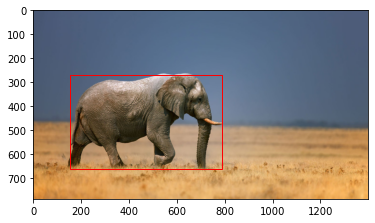

In [9]:
# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())
# load coco model weights
rcnn.load_weights('mask_rcnn_coco.h5', by_name=True)
# load photograph
img = load_img('elephant.jpg')
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=0)
# visualize the results
draw_image_with_boxes('elephant.jpg', results[0]['rois'])

### Inspect the results

In [10]:
results

[{'rois': array([[268, 151, 663, 787]], dtype=int32),
  'class_ids': array([21], dtype=int32),
  'scores': array([0.99990094], dtype=float32),
  'masks': array([[[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         ...,
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]]])}]

### Object detection
The Mask_RCNN API provides a function called display_instances() that will take the array of pixel values for the loaded image and the aspects of the prediction dictionary, such as the bounding boxes, scores, and class labels, and will plot the photo with all of these annotations.

One of the arguments is the list of predicted class identifiers available in the ‘class_ids‘ key of the dictionary. The function also needs a mapping of ids to class labels. The pre-trained model was fit with a dataset that had 80 (81 including background) class labels

In [12]:
from mrcnn.visualize import display_instances
from mrcnn.config import Config
from mrcnn.model import MaskRCNN

In [13]:
# define 81 classes that the coco model knowns about
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [14]:
# define the test configuration
class TestConfig(Config):
     NAME = "test"
     GPU_COUNT = 1
     IMAGES_PER_GPU = 1
     NUM_CLASSES = 1 + 80

The display_instances() function is flexible, allowing you to only draw the mask or only the bounding boxes.
Learn more about this in <b>visualize.py source file<b>

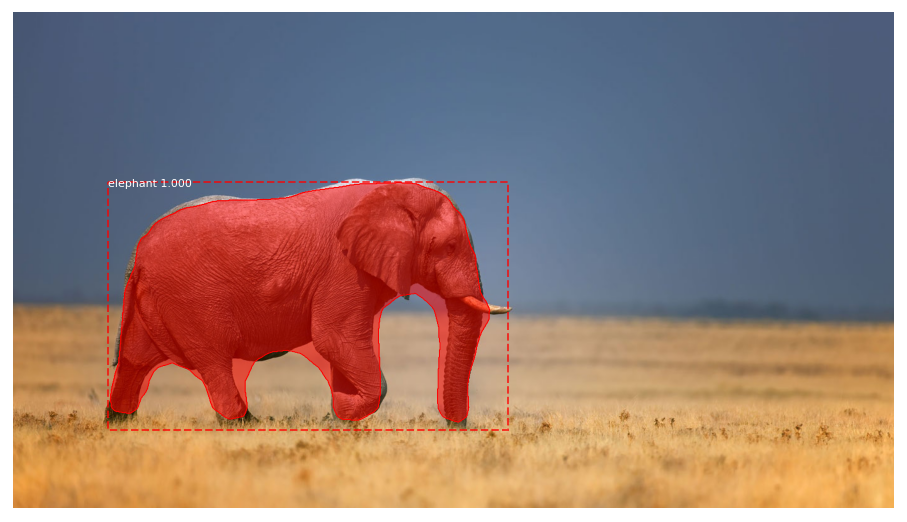

In [15]:
# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())
# load coco model weights
rcnn.load_weights('mask_rcnn_coco.h5', by_name=True)
# load photograph
img = load_img('elephant.jpg')
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=0)
# get dictionary for first prediction
r = results[0]
# show photo with bounding boxes, masks, class labels and scores
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

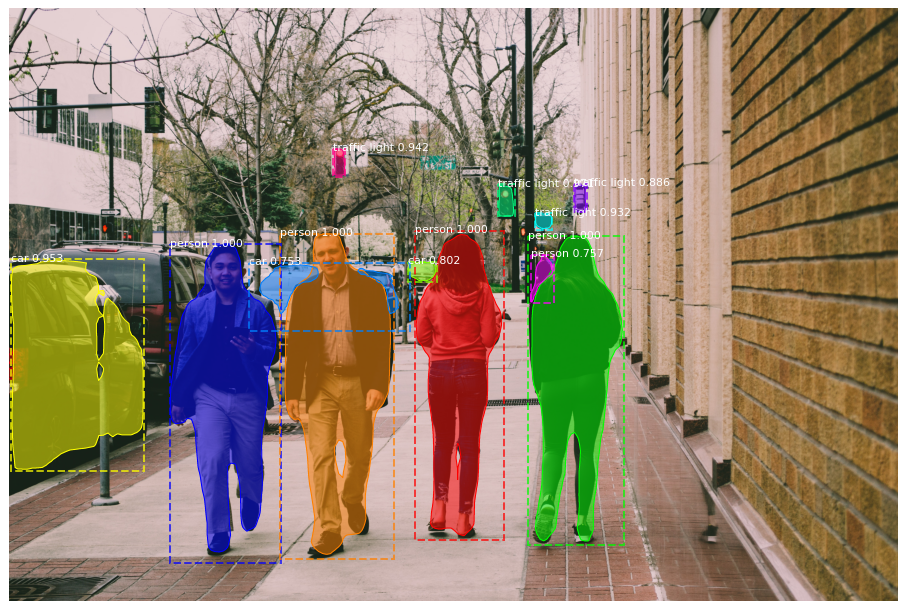

In [16]:
# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())
# load coco model weights
rcnn.load_weights('mask_rcnn_coco.h5', by_name=True)
# load photograph
img = load_img('people.jpg')
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=0)
# get dictionary for first prediction
r = results[0]
# show photo with bounding boxes, masks, class labels and scores
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

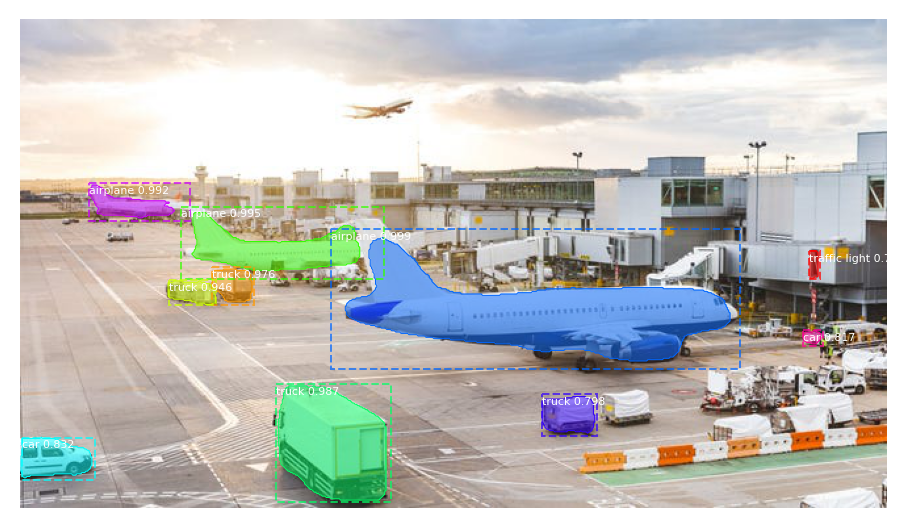

In [17]:
# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())
# load coco model weights
rcnn.load_weights('mask_rcnn_coco.h5', by_name=True)
# load photograph
img = load_img('plane.jpg')
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=0)
# get dictionary for first prediction
r = results[0]
# show photo with bounding boxes, masks, class labels and scores
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])